<a href="https://colab.research.google.com/github/UofGAnalytics/BOLDscalable/blob/master/coursematerial/week7/LSTM_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = 12, 10



/tmp/ipykernel_118/3732145773.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
airline_data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")

## Normalise and convert to numpy float

In [3]:
pass_data = airline_data.Passengers.values.astype(np.float32)
month = np.arange(len(pass_data))
pass_data -= np.min(pass_data)
pass_data /= np.max(pass_data)


## Hold back the last year of data as a test dataset

In [4]:
test_size = 12
train_size = len(pass_data) - test_size

train, test = pass_data[:train_size], pass_data[train_size:]
month_train, month_test = month[:train_size], month[train_size:]

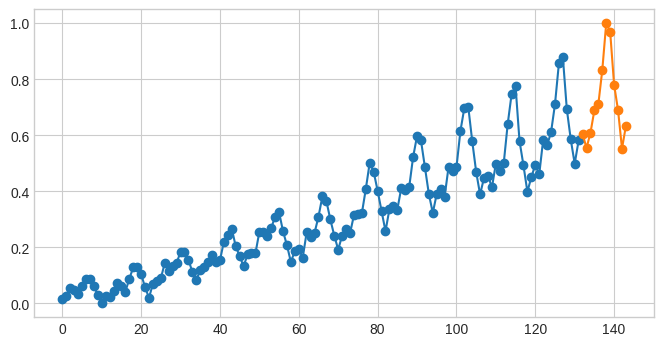

In [9]:
plt.figure(figsize=(8,4))
plt.plot(month_train,train,'-o')
plt.plot(month_test,test,'-o')
plt.show()

In [10]:

n_window = 12  # we'll train on 12 months of data
n_input =  1   # dimension of the input data
n_output = 1   # dimension of the prediction


## Create training batches

In [11]:
trainX, trainY = [], []
for i in range(len(train)-n_window):
    trainX.append(train[i:i + n_window])
    trainY.append(train[i + n_window])

trainX, trainY = np.array(trainX), np.array(trainY)


# reshape input
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],n_input))
trainY = np.reshape(trainY, (trainY.shape[0],n_output))



## Create the RNN

In [27]:
class PrintCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Print the desired variable
        print("Variable: ", self.lr)


In [33]:
model = tf.keras.Sequential()

rnn_cell = tf.keras.layers.LSTMCell(units=128)

model.add(tf.keras.layers.RNN(rnn_cell))

model.add(tf.keras.layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer='Adam')
model.fit(trainX, trainY, epochs=2000, batch_size=trainX.shape[0], verbose=1)

Epoch 1/2000
1/1 [==============================] - 1s 1s/step - loss: 0.1416
Epoch 2/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1098
Epoch 3/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.0820
Epoch 4/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.0580
Epoch 5/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.0379
Epoch 6/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0223
Epoch 7/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0125
Epoch 8/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0103
Epoch 9/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.0159
Epoch 10/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.0233
Epoch 11/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.0251
Epoch 12/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0217
Epoch 13/2000
1/1 [====================

In [18]:
trainY

array([[0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741312],
       [0.12741312],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285715],
       [0.11389961],
       [0.13127413],
       [0.14285715],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671814],
       [0.17181467],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640928],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.17374517],
       [0.17760618],
       [0.17760618],
       [0.25482625],
       [0.25289574],
       [0.24131274],
       [0.26833978],
       [0.3088803 ],
       [0.3243243 ],
       [0.25675675],
       [0.20656371],
       [0.14671814],
       [0.187

## Plot the predictions for each month

In [35]:
allX = []
for i in range(len(pass_data)-n_window):
    allX.append(pass_data[i:i + n_window])
    

allX = np.array(allX)


# reshape input
allX = np.reshape(allX, (allX.shape[0], allX.shape[1],n_input))

# y_pred = sess.run(prediction, feed_dict={x: allX})
y_pred = model.predict(allX)

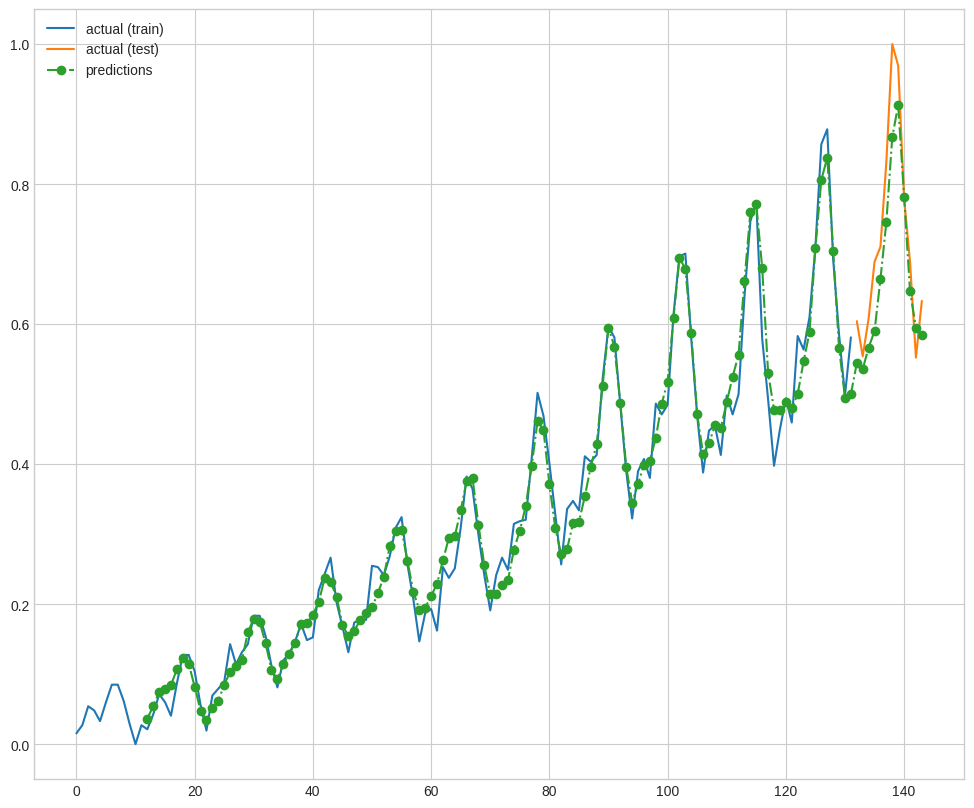

In [36]:


plt.plot(month_train,train,label='actual (train)')
plt.plot(month_test,test,label='actual (test)')
plt.plot(month[n_window:],y_pred,'-.o',label='predictions')
plt.legend(loc='best')
plt.show()